# [【SOTA】マイナビ × SIGNATE Student Cup 2019: 賃貸物件の家賃予測](https://signate.jp/competitions/264)

## 1. データ読み込み

In [521]:
import pandas as pd
import numpy as np
import pathlib
import os

# 学習データ、テストデータの読み込み
train_path = pathlib.Path("./DATA/train.csv")
test_path = pathlib.Path("./DATA/test.csv")

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [522]:
test_data.head()

,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\tエレベーター\t公営水...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,0年2ヶ月,南東,20.88m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tシューズボックス／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／...,"駐車場\t近隣\t34,000円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,23年4ヶ月,南東,26.93m2,1階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯...,"駐車場\t空有\t5,000円(税込)\t(敷金あり\t1ヶ月)\t駐輪場\t空有\tバイク...",【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,鉄骨造,2年間
3,31474,東京都杉並区和泉１丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,1K,36年2ヶ月,南東,23.57m2,1階／2階建,シャワー,ガスコンロ／\t給湯,NaN,エアコン付\tシューズボックス／\t2面採光／\t室外洗濯機置場\t公営水道／\t下水／\t...,駐輪場\t空有\t0円,【スーパー】 286m\t【スーパー】 702m\t【コンビニ】 489m\t【コンビニ】 ...,木造,2年間
4,31475,東京都杉並区堀ノ内２丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,2LDK,45年4ヶ月,南,50m2,4階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別,コンロ設置可（口数不明）／\t給湯,インターネット対応,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置...,"駐車場\t近隣\t22,600円\t距離177m",【コンビニ】 312m\t【コンビニ】 436m\t【スーパー】 902m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間


## 2. 前処理

### 2.1. データ選択

In [523]:
train_data_1 = train_data[["id", "アクセス", "所在地", "賃料", "間取り", "築年数", "面積", "所在階", "建物構造"]]
test_data_1 = test_data[["id", "アクセス", "所在地", "間取り", "築年数", "面積", "所在階", "建物構造"]]

### 2.2. 間取りの数値化

In [524]:
# 間取りにlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["間取り"],test_data_1["間取り"]]))

train_data_1["間取りID"] = le.transform(train_data_1["間取り"])
test_data_1["間取りID"] = le.transform(test_data_1["間取り"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 2.3. 面積の数値化

In [525]:
# 面積のカラムタイトルを面積[m2]に置換
train_data_1 = train_data_1.rename(columns={"面積": "面積m2"})
test_data_1 = test_data_1.rename(columns={"面積": "面積m2"})

In [526]:
# カラムタイトル面積[m2]の要素からm2を削除
train_data_1['面積m2'] = train_data_1['面積m2'].str.replace('m2', '').astype(float)
test_data_1['面積m2'] = test_data_1['面積m2'].str.replace('m2', '').astype(float)

### 2.4. 所在階の数値化

In [527]:
# 所在階の中身を"／"で2つの列に分割
train_data_1 = pd.concat([train_data_1, train_data_1['所在階'].str.split('／', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['所在階'].str.split('／', expand=True)], axis=1)

In [528]:
# 分割した所在階のカラム名変更　0:所在、1:階層
train_data_1 = train_data_1.rename(columns={0:"所在", 1:"階層"})
test_data_1 = test_data_1.rename(columns={0:"所在", 1:"階層"})

In [529]:
# 所在と階層の要素を整形
train_data_1['所在'] = train_data_1['所在'].str.replace('階', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('建', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('地下', '-')
train_data_1['所在'] = train_data_1['所在'].str.replace('\（.*\）', '', regex=True)
train_data_1['階層'] = train_data_1['階層'].str.replace('階建', '')
train_data_1['階層'] = train_data_1['階層'].str.replace('\（.*\）', '', regex=True)
train_data_1['所在'] = train_data_1['所在'].replace('', np.nan)

test_data_1['所在'] = test_data_1['所在'].str.replace('階', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('建', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('地下', '-')
test_data_1['所在'] = test_data_1['所在'].str.replace('\（.*\）', '', regex=True)
test_data_1['階層'] = test_data_1['階層'].str.replace('階建', '')
test_data_1['階層'] = test_data_1['階層'].str.replace('\（.*\）', '', regex=True)
test_data_1['所在'] = test_data_1['所在'].replace('', np.nan)

In [530]:
# # "階層"がNoneの箇所を"所在"の値で埋める
# train_data_1['階層'].fillna(train_data_1['所在'], inplace=True)
# test_data_1['階層'].fillna(test_data_1['所在'], inplace=True)

In [531]:
# 所在と階層の要素をfloat型に変換する
train_data_1['所在'] = train_data_1['所在'].astype(float)
train_data_1['階層'] = train_data_1['階層'].astype(float)

test_data_1['所在'] = test_data_1['所在'].astype(float)
test_data_1['階層'] = test_data_1['階層'].astype(float)

In [532]:
# 所在階のカラムを削除
train_data_1 = train_data_1.drop('所在階', axis=1)
test_data_1 = test_data_1.drop('所在階', axis=1)

In [533]:
# # 所在のNaNを埋める
# train_data_1.loc[train_data_1["所在"].isnull(), "所在"] = train_data_1["階層"]
# test_data_1.loc[test_data_1["所在"].isnull(), "所在"] = test_data_1["階層"]

In [534]:
# # 所在も階層も空欄のデータは間取りと面積の近いデータで埋める
# print(test_data_1[(test_data_1["間取りID"] == 21) & (test_data_1["面積m2"] > 90) & (test_data_1["面積m2"] < 95)].mean())
# test_data_1.loc[test_data_1["id"]==40675, "所在"] = float(6)
# test_data_1.loc[test_data_1["id"]==40675, "階層"] = float(9)

### 2.5. 築年数の数値化

In [535]:
# 新築の場合は全て0にする
train_data_1.loc[train_data_1["築年数"]=="新築", "築年数"] = float(0)
test_data_1.loc[test_data_1["築年数"]=="新築", "築年数"] = float(0)

In [536]:
# 築年数を数値に変換する
train_data_1 = pd.concat([train_data_1, train_data_1['築年数'].str.split('年', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['築年数'].str.split('年', expand=True)], axis=1)

In [537]:
# ヶ月を消す
train_data_1[1] = train_data_1[1].str.replace('ヶ月', '')
test_data_1[1] = test_data_1[1].str.replace('ヶ月', '')

In [538]:
# 築年数をfloat変換
train_data_1["築年数"] = train_data_1[0].astype(float) + (train_data_1[1].astype(float) / float(10))
test_data_1["築年数"] = test_data_1[0].astype(float) + (test_data_1[1].astype(float) / float(10))

In [539]:
test_data_1.head()

,id,アクセス,所在地,間取り,築年数,面積m2,建物構造,間取りID,所在,階層,0,1
0,31471,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,東京都世田谷区深沢５丁目1-27,2LDK,49.0,50.22,鉄骨造,14,8.0,8.0,49,0
1,31472,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,東京都目黒区八雲１丁目11-8,1R,0.2,20.88,RC（鉄筋コンクリート）,9,3.0,4.0,0,2
2,31473,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,東京都豊島区池袋本町２丁目22-2,1K,23.4,26.93,鉄骨造,3,1.0,4.0,23,4
3,31474,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,東京都杉並区和泉１丁目,1K,36.2,23.57,木造,3,1.0,2.0,36,2
4,31475,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,東京都杉並区堀ノ内２丁目,2LDK,45.4,50.00,RC（鉄筋コンクリート）,14,4.0,4.0,45,4


In [540]:
print(test_data_1[test_data_1["築年数"].isnull()])

          id                                               アクセス  \
77     31548  東急多摩川線\t矢口渡駅\t徒歩7分\t\t京浜東北線\t蒲田駅\t徒歩20分\t\t東急池...   
108    31579  東急田園都市線\t三軒茶屋駅\t徒歩8分\t\t東急世田谷線\t三軒茶屋駅\t徒歩9分\t\...   
112    31583  日比谷線\t仲御徒町駅\t徒歩6分\t\t山手線\t秋葉原駅\t徒歩9分\t\t山手線\t御...   
156    31627  京急本線\t大森海岸駅\t徒歩8分\t\t京浜東北線\t大森(東京都)駅\t徒歩11分\t\...   
162    31633  半蔵門線\t住吉(東京都)駅\t徒歩7分\t\t都営新宿線\t西大島駅\t徒歩23分\t\t...   
...      ...                                                ...   
31141  62612  小田急小田原線\t千歳船橋駅\t徒歩15分\t\t小田急小田原線\t祖師ケ谷大蔵駅\t徒歩1...   
31176  62647  東西線\t葛西駅\t徒歩10分\t\t東西線\t西葛西駅\t徒歩23分\t\t京葉線(東京－...   
31181  62652  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   
31182  62653  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   
31212  62683  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   

                    所在地       間取り  築年数   面積m2          建物構造  間取りID   所在    階層  \
77         東京都大田区東矢口２丁目  1K+S(納戸)  NaN  23.80           鉄骨造      4  2.0   3.0   
108    東京都世田谷区上馬２丁目26-8        1K

In [541]:
# 0と1の列を消す
train_data_1 = train_data_1.drop(0, axis=1)
train_data_1 = train_data_1.drop(1, axis=1)

test_data_1 = test_data_1.drop(0, axis=1)
test_data_1 = test_data_1.drop(1, axis=1)

### 2.6. 緯度経度情報の追加

#### [このサイト](https://ktgis.net/gcode/geocoding.html)を利用する

In [542]:
# IDと住所をファイル出力
train_coordinate = train_data[["id", "所在地"]]
test_coordinate = test_data[["id", "所在地"]]

train_coordinate.to_csv("train_coordinate.csv", header=False, index=False)
test_coordinate.to_csv("test_coordinate.csv", header=False, index=False)

In [543]:
# 緯度、経度情報の読み込み(id, 所在地, 経度, 緯度)
train_coordinate_addvalue = pd.read_excel("train_coordinate_addvalue.xlsx")
test_coordinate_addvalue = pd.read_excel("test_coordinate_addvalue.xlsx")

In [544]:
train_data_1 = pd.merge(train_data_1, train_coordinate_addvalue[["id", "経度", "緯度"]], on='id')
test_data_1 = pd.merge(test_data_1, test_coordinate_addvalue[["id", "経度", "緯度"]], on='id')

### 2.7. 部屋数の追加

In [545]:
# 部屋数のマージ
number_of_rooms = pd.read_excel("number_of_rooms.xlsx")
train_data_1 = pd.merge(train_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')
test_data_1 = pd.merge(test_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')

In [546]:
# インデックスの振り直し
train_data_1 = train_data_1.sort_values("id")
train_data_1 = train_data_1.reset_index(drop=True)

test_data_1 = test_data_1.sort_values("id")
test_data_1 = test_data_1.reset_index(drop=True)

### 2.8. 1部屋当たりの面積追加

In [547]:
# 面積と部屋数から1部屋当たりの面積を算出
train_data_1["1部屋当たり面積m2"] = (train_data_1["面積m2"] / train_data_1["部屋数"]).astype(float)
test_data_1["1部屋当たり面積m2"] = (test_data_1["面積m2"] / test_data_1["部屋数"]).astype(float)

In [548]:
# 間取りと間取りIDは削除する
train_data_1 = train_data_1.drop('間取り', axis=1)
test_data_1 = test_data_1.drop('間取り', axis=1)

# train_data_1 = train_data_1.drop('間取りID', axis=1)
# test_data_1 = test_data_1.drop('間取りID', axis=1)

#### 2.9. 建物の高さ率を追加(高さ率=所在/階層)

In [549]:
# 高さ率の算出
train_data_1["高さ率"] = (train_data_1["所在"] / train_data_1["階層"]).astype(float)
test_data_1["高さ率"] = (test_data_1["所在"] / test_data_1["階層"]).astype(float)

### 2.10. 建物構造の数値化

In [550]:
train_data_1["建物構造"].value_counts()

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: 建物構造, dtype: int64

In [551]:
# 建物構造にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["建物構造"],test_data_1["建物構造"]]))

train_data_1["建物構造ID"] = le.transform(train_data_1["建物構造"])
test_data_1["建物構造ID"] = le.transform(test_data_1["建物構造"])

In [552]:
# 不要になった建物構造カラムを削除する
train_data_1 = train_data_1.drop('建物構造', axis=1)
test_data_1 = test_data_1.drop('建物構造', axis=1)

### 2.11. 新規カラムに「賃料/面積」を追加

In [553]:
train_data_1["賃料/面積"] = train_data_1["賃料"] / train_data_1["面積m2"]

### 2.12. 東京23区の地域ごとに、住宅地の平均地価情報を追加

In [554]:
# 区の情報の確認(23区だけだった)
# sample = train_data["所在地"].str.extract("東京都(.+区)", expand=True)
# sample.value_counts()

In [555]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [556]:
# 訓練データとテストデータに、エリア情報を追加
train_data_1["エリア"] = ""
test_data_1["エリア"] = ""
train_data_1["エリア"] = train_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)
test_data_1["エリア"] = test_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)

In [557]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [558]:
# 一部エリア情報に数値が残ってしまうので、消す
train_data_1["エリア"] = train_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("一丁目", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("-", "")

test_data_1["エリア"] = test_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("一丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("二丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("四丁目", "")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [559]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [560]:
# 坪単価情報の読込～結合
wards_value = pd.read_excel("23区_地域毎_坪単価.xlsx")
train_data_1 = pd.merge(train_data_1, wards_value, on="エリア", how="left")
test_data_1 = pd.merge(test_data_1, wards_value, on="エリア", how="left")
train_data_1 = train_data_1.sort_values("id")
test_data_1 = test_data_1.sort_values("id")

train_data_1 = train_data_1.drop("Unnamed: 4", axis=1)
test_data_1 = test_data_1.drop("Unnamed: 4", axis=1)

In [561]:
# 地価の抜けデータを平均値で補間
# 江東区
train_data_1.loc[train_data_1["id"]==2767, "区"] = "江東区"
train_data_1.loc[train_data_1["id"]==7559, "区"] = "江東区"
train_data_1.loc[train_data_1["id"]==2767, "平均坪単価（万円）"] = 206.6
train_data_1.loc[train_data_1["id"]==7559, "平均坪単価（万円）"] = 206.6
# 港区
train_data_1.loc[train_data_1["id"]==17654, "区"] = "港区"
train_data_1.loc[train_data_1["id"]==17654, "平均坪単価（万円）"] = 1321.4

In [562]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [563]:
print(train_data_1[train_data_1["平均坪単価（万円）"].isnull()])
print(test_data_1[test_data_1["平均坪単価（万円）"].isnull()])

Empty DataFrame
Columns: [id, アクセス, 所在地, 賃料, 築年数, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, 賃料/面積, エリア, 区, 地名, 平均坪単価（万円）]
Index: []
Empty DataFrame
Columns: [id, アクセス, 所在地, 築年数, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, エリア, 区, 地名, 平均坪単価（万円）]
Index: []


### 2.13. 欠損値を区の平均値で埋める

In [564]:
train_data_1["築年数"] = train_data_1.groupby('区')["築年数"].transform(lambda x:x.fillna(x.mean()))
train_data_1["所在"] = train_data_1.groupby('区')["所在"].transform(lambda x:x.fillna(x.mean()))
train_data_1["階層"] = train_data_1.groupby('区')["階層"].transform(lambda x:x.fillna(x.mean()))

test_data_1["築年数"] = test_data_1.groupby('区')["築年数"].transform(lambda x:x.fillna(x.mean()))
test_data_1["所在"] = test_data_1.groupby('区')["所在"].transform(lambda x:x.fillna(x.mean()))
test_data_1["階層"] = test_data_1.groupby('区')["階層"].transform(lambda x:x.fillna(x.mean()))

In [565]:
# 高さ率の更新
train_data_1["高さ率"] = (train_data_1["所在"] / train_data_1["階層"]).astype(float)
test_data_1["高さ率"] = (test_data_1["所在"] / test_data_1["階層"]).astype(float)

### 2.14. 区IDと区ごとの統計情報の追加

In [566]:
# 区にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["区"],test_data_1["区"]]))

train_data_1["区ID"] = le.transform(train_data_1["区"])
test_data_1["区ID"] = le.transform(test_data_1["区"])

In [567]:
# 区ごとの統計情報の追加
# 例）新宿区のとある物件の築年数の統計値：(【1】-【2】)*【1】/【2】
# 【1】該当物件の築年数、【2】新宿区の物件の平均築年数

def relative_distribution(self, target, value): 
    new_column = value + "@" + target
    self[new_column] = self.groupby(target)[value].transform("mean").copy()
    self[new_column] = (self[value] - self[new_column]) * self[value] / self[new_column]

relative_distribution(train_data_1, "区ID", "築年数")
relative_distribution(train_data_1, "区ID", "面積m2")
relative_distribution(train_data_1, "区ID", "所在")
relative_distribution(train_data_1, "区ID", "階層")
relative_distribution(train_data_1, "区ID", "部屋数")
relative_distribution(train_data_1, "区ID", "1部屋当たり面積m2")
relative_distribution(train_data_1, "区ID", "平均坪単価（万円）")
# relative_distribution(train_data_1, "区ID", "Recciprocal_distance_km")
# relative_distribution(train_data_1, "区ID", "徒歩分数")

relative_distribution(train_data_1, "間取りID", "築年数")
relative_distribution(train_data_1, "間取りID", "面積m2")
relative_distribution(train_data_1, "間取りID", "所在")
relative_distribution(train_data_1, "間取りID", "階層")
relative_distribution(train_data_1, "間取りID", "部屋数")
relative_distribution(train_data_1, "間取りID", "1部屋当たり面積m2")
relative_distribution(train_data_1, "間取りID", "平均坪単価（万円）")
# relative_distribution(train_data_1, "間取りID", "Recciprocal_distance_km")
# relative_distribution(train_data_1, "間取りID", "徒歩分数")

relative_distribution(train_data_1, "建物構造ID", "築年数")
relative_distribution(train_data_1, "建物構造ID", "面積m2")
relative_distribution(train_data_1, "建物構造ID", "所在")
relative_distribution(train_data_1, "建物構造ID", "階層")
relative_distribution(train_data_1, "建物構造ID", "部屋数")
relative_distribution(train_data_1, "建物構造ID", "1部屋当たり面積m2")
relative_distribution(train_data_1, "建物構造ID", "平均坪単価（万円）")
# relative_distribution(train_data_1, "建物構造ID", "Recciprocal_distance_km")
# relative_distribution(train_data_1, "建物構造ID", "徒歩分数")

relative_distribution(test_data_1, "区ID", "築年数")
relative_distribution(test_data_1, "区ID", "面積m2")
relative_distribution(test_data_1, "区ID", "所在")
relative_distribution(test_data_1, "区ID", "階層")
relative_distribution(test_data_1, "区ID", "部屋数")
relative_distribution(test_data_1, "区ID", "1部屋当たり面積m2")
relative_distribution(test_data_1, "区ID", "平均坪単価（万円）")
# relative_distribution(test_data_1, "区ID", "Recciprocal_distance_km")
# relative_distribution(test_data_1, "区ID", "徒歩分数")

relative_distribution(test_data_1, "間取りID", "築年数")
relative_distribution(test_data_1, "間取りID", "面積m2")
relative_distribution(test_data_1, "間取りID", "所在")
relative_distribution(test_data_1, "間取りID", "階層")
relative_distribution(test_data_1, "間取りID", "部屋数")
relative_distribution(test_data_1, "間取りID", "1部屋当たり面積m2")
relative_distribution(test_data_1, "間取りID", "平均坪単価（万円）")
# relative_distribution(test_data_1, "間取りID", "Recciprocal_distance_km")
# relative_distribution(test_data_1, "間取りID", "徒歩分数")

relative_distribution(test_data_1, "建物構造ID", "築年数")
relative_distribution(test_data_1, "建物構造ID", "面積m2")
relative_distribution(test_data_1, "建物構造ID", "所在")
relative_distribution(test_data_1, "建物構造ID", "階層")
relative_distribution(test_data_1, "建物構造ID", "部屋数")
relative_distribution(test_data_1, "建物構造ID", "1部屋当たり面積m2")
relative_distribution(test_data_1, "建物構造ID", "平均坪単価（万円）")
# relative_distribution(test_data_1, "建物構造ID", "Recciprocal_distance_km")
# relative_distribution(test_data_1, "建物構造ID", "徒歩分数")

### 2.15. 重複物件の抽出・削除

In [568]:
# 重複確認用のデータ出力
# train_duplicate = pd.concat([train_data[["id", "賃料", "所在地"]], train_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)
# test_duplicate = pd.concat([test_data[["id", "所在地"]], test_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)

In [569]:
# 結果の出力
# train_duplicate.to_excel("train_duplicate.xlsx", header=True, index=False)
# test_duplicate.to_excel("test_duplicate.xlsx", header=True, index=False)

In [570]:
# 重複対象のデータ読み込み
train_duplicate_flag = pd.read_excel("./重複/1_trainデータ内の重複flag.xlsx")
test_duplicate_flag = pd.read_excel("./重複/2_testデータ内のtrainとの重複flag.xlsx")

In [571]:
# データ数のチェック
print("Train:", len(train_data_1), "-", len(train_duplicate_flag), "=", len(train_data_1)-len(train_duplicate_flag))
print("Test:", len(test_data_1), "-", len(test_duplicate_flag), "=", len(test_data_1)-len(test_duplicate_flag))

Train: 31470 - 31470 = 0
Test: 31262 - 31262 = 0


In [572]:
# 重複フラグを結合
train_data_1 = pd.merge(train_data_1, train_duplicate_flag, on="id")
train_data_1 = train_data_1.rename(columns={"賃料_x":"賃料"})
train_data_1 = train_data_1.drop('賃料_y', axis=1)

test_data_1 = pd.merge(test_data_1, test_duplicate_flag, on="id")

In [573]:
# flag=1.0の列を削除
print("【削除前】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))
train_data_1 = train_data_1.loc[train_data_1["flag"] != 1.0]
test_data_1 = test_data_1.loc[test_data_1["flag"] != 1.0]
print("【削除後】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))

【削除前】 train: 31470 ,  test: 31262
【削除後】 train: 28095 ,  test: 24812


In [575]:
# 不要なカラムを削除する
train_data_1 = train_data_1.drop(["アクセス", "所在地", "エリア", "区", "地名"], axis=1)
test_data_1 = test_data_1.drop(["アクセス", "所在地", "エリア", "区", "地名"], axis=1)

In [576]:
test_data_1.columns

Index(['id', '築年数', '面積m2', '間取りID', '所在', '階層', '経度', '緯度', '部屋数',
       '1部屋当たり面積m2', '高さ率', '建物構造ID', '平均坪単価（万円）', '区ID', '築年数@区ID',
       '面積m2@区ID', '所在@区ID', '階層@区ID', '部屋数@区ID', '1部屋当たり面積m2@区ID',
       '平均坪単価（万円）@区ID', '築年数@間取りID', '面積m2@間取りID', '所在@間取りID', '階層@間取りID',
       '部屋数@間取りID', '1部屋当たり面積m2@間取りID', '平均坪単価（万円）@間取りID', '築年数@建物構造ID',
       '面積m2@建物構造ID', '所在@建物構造ID', '階層@建物構造ID', '部屋数@建物構造ID',
       '1部屋当たり面積m2@建物構造ID', '平均坪単価（万円）@建物構造ID', 'flag'],
      dtype='object')

## 3. データチェック

In [577]:
train_data_1.isnull().sum()

id                       0
賃料                       0
築年数                      0
面積m2                     0
間取りID                    0
所在                       0
階層                       0
経度                       0
緯度                       0
部屋数                      0
1部屋当たり面積m2               0
高さ率                      0
建物構造ID                   0
賃料/面積                    0
平均坪単価（万円）                0
区ID                      0
築年数@区ID                  0
面積m2@区ID                 0
所在@区ID                   0
階層@区ID                   0
部屋数@区ID                  0
1部屋当たり面積m2@区ID           0
平均坪単価（万円）@区ID            0
築年数@間取りID                0
面積m2@間取りID               0
所在@間取りID                 0
階層@間取りID                 0
部屋数@間取りID                0
1部屋当たり面積m2@間取りID         0
平均坪単価（万円）@間取りID          0
築年数@建物構造ID               0
面積m2@建物構造ID              0
所在@建物構造ID                0
階層@建物構造ID                0
部屋数@建物構造ID               0
1部屋当たり面積m2@建物構造ID        0
平均坪単価（万円）@建物構造ID         0
f

In [578]:
test_data_1.isnull().sum()

id                       0
築年数                      0
面積m2                     0
間取りID                    0
所在                       0
階層                       0
経度                       0
緯度                       0
部屋数                      0
1部屋当たり面積m2               0
高さ率                      0
建物構造ID                   0
平均坪単価（万円）                0
区ID                      0
築年数@区ID                  0
面積m2@区ID                 0
所在@区ID                   0
階層@区ID                   0
部屋数@区ID                  0
1部屋当たり面積m2@区ID           0
平均坪単価（万円）@区ID            0
築年数@間取りID                0
面積m2@間取りID               0
所在@間取りID                 0
階層@間取りID                 0
部屋数@間取りID                0
1部屋当たり面積m2@間取りID         0
平均坪単価（万円）@間取りID          0
築年数@建物構造ID               0
面積m2@建物構造ID              0
所在@建物構造ID                0
階層@建物構造ID                0
部屋数@建物構造ID               0
1部屋当たり面積m2@建物構造ID        0
平均坪単価（万円）@建物構造ID         0
flag                 24812
dtype: int64

In [579]:
len(train_data_1)

28095

In [580]:
len(train_data)

31470

In [581]:
len(test_data_1)

24812

In [582]:
len(test_data)

31262

In [583]:
train_data_1.head()

,id,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,...,1部屋当たり面積m2@間取りID,平均坪単価（万円）@間取りID,築年数@建物構造ID,面積m2@建物構造ID,所在@建物構造ID,階層@建物構造ID,部屋数@建物構造ID,1部屋当たり面積m2@建物構造ID,平均坪単価（万円）@建物構造ID,flag
0,1,75000,9.9,20.01,3,1.0,12.0,139.727873,35.747759,1.0,...,-3.236643,-38.038810,-2.792034,-8.895291,-0.792553,4.303737,-0.474861,-0.882339,-53.491739,NaN
1,2,76000,45.0,16.50,9,5.0,10.0,139.780485,35.662406,1.0,...,-3.651465,118.349155,46.072275,-8.215002,4.703136,15.796408,-0.469495,-2.187587,269.474933,NaN
2,3,110000,8.6,22.05,3,12.0,15.0,139.667375,35.675358,1.0,...,-1.682253,135.954257,-3.236209,-8.553501,17.872314,10.474588,-0.474861,1.176559,85.886766,NaN
3,4,150000,29.4,60.48,14,3.0,4.0,139.648495,35.700193,3.5,...,0.000328,14.029801,33.285864,41.057743,-1.132980,-2.188474,2.932959,-3.015546,-3.071998,NaN
4,5,74000,31.7,39.66,10,1.0,2.0,139.872315,35.766413,3.0,...,-0.847219,-36.277218,18.240884,13.702275,-0.400145,-0.351656,2.328750,-3.460641,-36.540480,NaN


In [586]:
test_data_1.head()

,id,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,...,1部屋当たり面積m2@間取りID,平均坪単価（万円）@間取りID,築年数@建物構造ID,面積m2@建物構造ID,所在@建物構造ID,階層@建物構造ID,部屋数@建物構造ID,1部屋当たり面積m2@建物構造ID,平均坪単価（万円）@建物構造ID,flag
0,31471,49.0,50.22,14,8.0,8.0,139.652762,35.617708,3.5,14.348571,...,-2.351941,-23.756695,61.167676,27.877538,16.853456,8.628681,3.070407,-3.503228,36.762779,NaN
1,31472,0.2,20.88,9,3.0,4.0,139.672871,35.617709,1.0,20.880000,...,-0.328616,42.530116,-0.197136,-8.796568,-1.155096,-2.200138,-0.478207,0.067372,17.396033,NaN
2,31473,23.4,26.93,3,1.0,4.0,139.709049,35.741996,1.0,26.930000,...,3.611782,-34.736550,1.724287,-4.472747,-0.611665,0.157170,-0.463640,11.273106,9.724231,NaN
3,31474,36.2,23.57,3,1.0,2.0,139.658270,35.673602,1.0,23.570000,...,-0.174042,-35.972038,28.949210,-4.983105,-0.402172,-0.389133,-0.416894,7.416685,19.076899,NaN
5,31476,25.6,21.45,9,1.0,2.0,139.686023,35.691395,1.0,21.450000,...,0.238758,71.940253,6.981565,-6.056327,-0.402172,-0.389133,-0.416894,4.213185,224.465113,NaN


## 4.学習 

In [585]:
# IDとflagの削除
train_data_1_no_ID = train_data_1.drop(["id", "flag"], axis=1)
test_data_1_no_ID = test_data_1.drop(["id", "flag"], axis=1)

In [587]:
# 特徴データと目的変数の設定
train_x = train_data_1_no_ID.drop(["賃料", "賃料/面積"], axis=1)
train_y = train_data_1_no_ID["賃料/面積"]

test_x = test_data_1_no_ID

## 5. 検証

In [588]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

scores = []
# GBDT用のハイパーパラメータ
# params = {"objective": "reg:squarederror", "sileng":1, "random_state":71, "eval_metric":"rmse"}
params = {
    "silent": 1,
    "max_depth": 8, #best_param = 8
    "min_child_weight": 1,
    "eta": 0.1, #best_param = 0.1
    "tree_method": "exact",
    "objective": "reg:linear",
    "eval_metric": "rmse",
    "predictor": "cpu_predictor"
}
num_round = 50

# クロスバリデーション
kf = KFold(n_splits=5, shuffle=True, random_state=71)
for tr_idx, va_idx, in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    # GBDTで学習実行
    dtrain = xgb.DMatrix(tr_x, label=tr_y) # enable_categorical=True
    dvalid = xgb.DMatrix(va_x, label=va_y)
    dtest = xgb.DMatrix(test_x)
    
    watchlist = [(dtrain, "train"), (dvalid, "eval")]
#     model = xgb.train(params, dtrain, num_round, evals=watchlist)
    model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  evals=[(dvalid, "test")])

[12:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	test-rmse:3313.40015
[1]	test-rmse:2991.37158
[2]	test-rmse:2701.31250
[3]	test-rmse:2441.51514
[4]	test-rmse:2207.84253
[5]	test-rmse:1998.48218
[6]	test-rmse:1810.44080
[7]	test-rmse:1642.02783
[8]	test-rmse:1490.54590
[9]	test-rmse:1355.22498
[10]	test-rmse:1234.59924
[11]	test-rmse:1127.13635
[12]	test-rmse:1031.55762
[13]	test-rmse:946.09094
[14]	test-rmse:870.41443
[15]	test-rmse:803.04333
[16]	test-rmse:744.52387
[17]	test

In [448]:
# # ★Group K-Fold用★
# import xgboost as xgb
# from xgboost import XGBClassifier
# from sklearn.metrics import log_loss, accuracy_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GroupKFold

# scores = []
# # GBDT用のハイパーパラメータ
# # params = {"objective": "reg:squarederror", "sileng":1, "random_state":71, "eval_metric":"rmse"}
# params = {
#     "silent": 1,
#     "max_depth": 8, #best_param = 8
#     "min_child_weight": 1,
#     "eta": 0.1, #best_param = 0.1
#     "tree_method": "exact",
#     "objective": "reg:linear",
#     "eval_metric": "rmse",
#     "predictor": "cpu_predictor"
# }
# num_round = 50

# # クロスバリデーション
# gkf = GroupKFold(n_splits=4)
# for tr_idx, va_idx, in gkf.split(train_x, train_y, train_x["区ID"]):
#     tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
#     tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
#     # GBDTで学習実行
#     dtrain = xgb.DMatrix(tr_x, label=tr_y) # enable_categorical=True
#     dvalid = xgb.DMatrix(va_x, label=va_y)
#     dtest = xgb.DMatrix(test_x)
    
#     watchlist = [(dtrain, "train"), (dvalid, "eval")]
# #     model = xgb.train(params, dtrain, num_round, evals=watchlist)
#     model = xgb.train(params=params,
#                   dtrain=dtrain,
#                   num_boost_round=1000,
#                   early_stopping_rounds=5,
#                   evals=[(dvalid, "test")])

In [449]:
# gridsearch_params = [
#     (max_depth, eta)
#     for max_depth in [6,7,8]
#     for eta in [0.1, 0.05, 0.01]
# ]

In [450]:
# min_rmse = float("Inf") # 最初は無限大に設定しておく
# best_param = []

# for max_depth, eta in gridsearch_params:
#     print("max_depth={}, eta={}".format(max_depth, eta))

#     params["max_depth"] = max_depth
#     params["eta"] = eta

#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=1000,
#         seed=0,
#         nfold=5, # CVの分割数
#         metrics={"rmse"},
#         early_stopping_rounds=5
#     )

#     mean_rmse = cv_results["test-rmse-mean"].min()
#     boost_rounds = cv_results["test-rmse-mean"].argmin()
#     print("RMSE {} for {} rounds".format(mean_rmse, boost_rounds))
#     if mean_rmse < min_rmse:
#         min_rmse = mean_rmse
#         best_param = (max_depth, eta)

# print("Best params {}, RMSE {}".format(best_param, min_rmse))
# best_param = (8, 0.1)

## 5. 検証

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:104: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  UserWarning


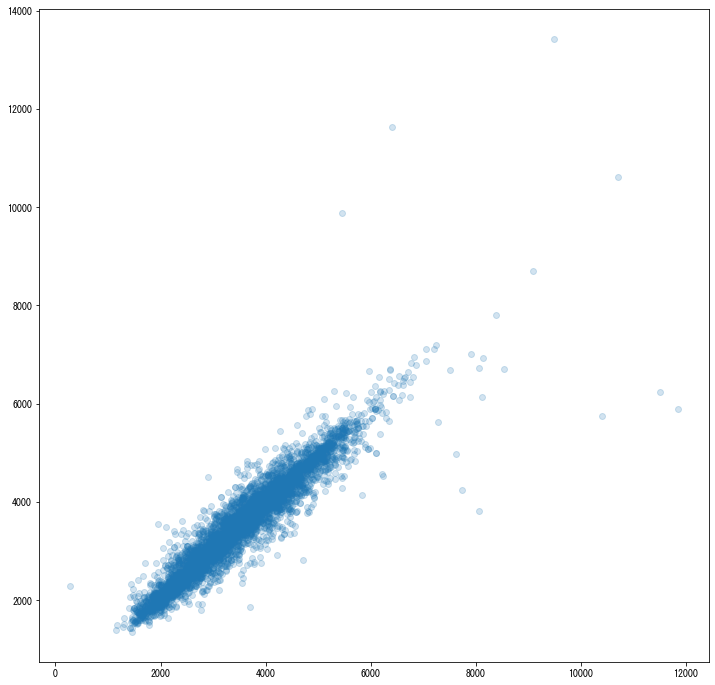

In [605]:
prediction = model.predict(xgb.DMatrix(va_x), ntree_limit=model.best_ntree_limit) # 一番良いモデルで予測する

plt.figure(figsize=(12, 12))
plt.scatter(va_y, prediction, alpha=0.2) # 表示の関係で1000個までとする
plt.show()

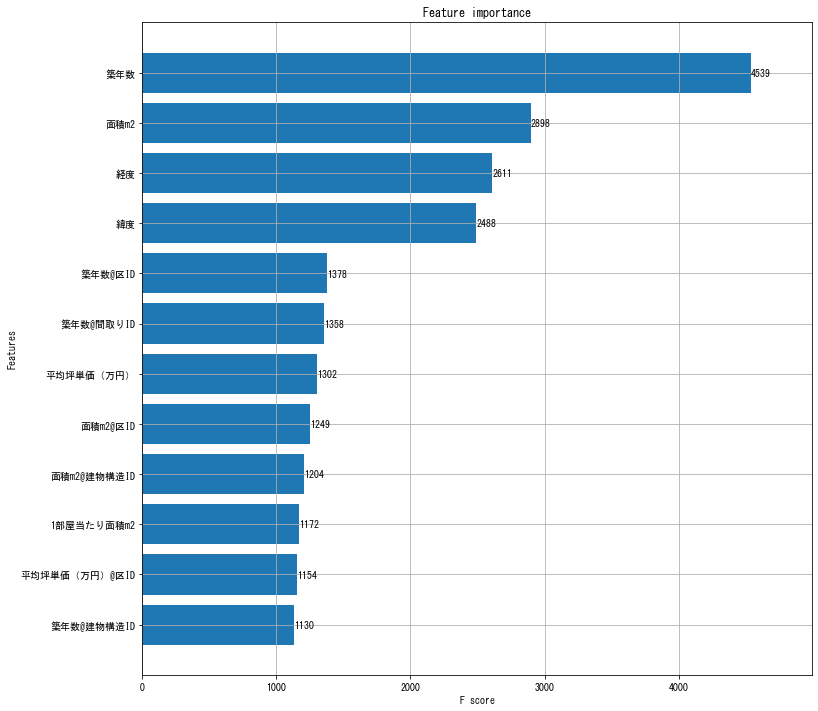

In [590]:
git, ax = plt.subplots(figsize=(12, 12))
xgb.plot_importance(model, max_num_features=12, height=0.8, ax=ax)
plt.show()

## 6. 予測

In [607]:
# テストデータでの予測
pred = model.predict(xgb.DMatrix(test_x), ntree_limit=model.best_ntree_limit) # 一番良いモデルで予測する
# pred = model.predict(dtest)

In [608]:
pred

array([2508.8635, 5493.44  , 3002.7842, ..., 4431.4297, 3801.151 ,
       3851.3699], dtype=float32)

In [593]:
len(pred)

24812

In [594]:
len(test_data_1)

24812

## 7. データ出力

In [609]:
# 予測結果の結合
test_data_1["賃料/面積"] = pred

In [610]:
test_data_1.head()

,id,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,...,築年数@建物構造ID,面積m2@建物構造ID,所在@建物構造ID,階層@建物構造ID,部屋数@建物構造ID,1部屋当たり面積m2@建物構造ID,平均坪単価（万円）@建物構造ID,flag,賃料/面積,賃料
0,31471,49.0,50.22,14,8.0,8.0,139.652762,35.617708,3.5,14.348571,...,61.167676,27.877538,16.853456,8.628681,3.070407,-3.503228,36.762779,NaN,2508.863525,126053
1,31472,0.2,20.88,9,3.0,4.0,139.672871,35.617709,1.0,20.880000,...,-0.197136,-8.796568,-1.155096,-2.200138,-0.478207,0.067372,17.396033,NaN,5493.439941,114717
2,31473,23.4,26.93,3,1.0,4.0,139.709049,35.741996,1.0,26.930000,...,1.724287,-4.472747,-0.611665,0.157170,-0.463640,11.273106,9.724231,NaN,3002.784180,80462
3,31474,36.2,23.57,3,1.0,2.0,139.658270,35.673602,1.0,23.570000,...,28.949210,-4.983105,-0.402172,-0.389133,-0.416894,7.416685,19.076899,NaN,2664.630371,62896
5,31476,25.6,21.45,9,1.0,2.0,139.686023,35.691395,1.0,21.450000,...,6.981565,-6.056327,-0.402172,-0.389133,-0.416894,4.213185,224.465113,NaN,3233.894287,69352


In [596]:
# 予測結果から賃料を算出し、int型に変換
test_data_1["賃料"] = (test_data_1["面積m2"] * test_data_1["賃料/面積"]).astype(int)

In [599]:
result = test_data_1[["id", "賃料"]]

In [600]:
result

,id,賃料
0,31471,126053
1,31472,114717
2,31473,80462
3,31474,62896
5,31476,69352
...,...,...
31255,62726,101353
31257,62728,102807
31258,62729,100642
31259,62730,173984


In [601]:
len(result)

24812

In [602]:
# 除外していた重複idの賃料を戻す
test_duplicate_rentvalue = pd.read_excel("./重複/3_testデータ内のtrainとの重複物件の家賃.xlsx")
result = pd.concat([result, test_duplicate_rentvalue])
result = result.sort_values("id")
len(result)

31262

In [603]:
result

,id,賃料
0,31471,126053
1,31472,114717
2,31473,80462
3,31474,62896
0,31475,90000
...,...,...
31257,62728,102807
31258,62729,100642
31259,62730,173984
6449,62731,280000


In [604]:
result.to_csv("result.csv", header=False, index=False)